In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [16]:
teams_df = pd.read_csv('data/2025/mens_champ_teams.csv')
teams_df

,Club ID,Club
0,175734,THE BOROUGH FC MEN
1,175326,GUELPH UNITED MEN
2,175331,HAMILTON UNITED MEN
3,175387,MASTER'S FA MEN
4,175391,NORTH MISSISSAUGA SC MEN
5,175414,PICKERING FC MEN
6,176208,SUDBURY CYCLONES MEN
7,175408,UNIONVILLE MILLIKEN SC MEN
8,183406,WATERLOO UNITED MEN
9,183408,WHITBY FC MEN


In [17]:
scores_df = pd.read_csv('data/2025/2025-06-28_mens_champ_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,261900659,0,1,183189,176208
1,261900660,0,3,175405,175408
2,261900661,1,1,183408,175734
3,261900662,3,0,175391,175331
4,261900663,1,0,175387,183406
...,...,...,...,...,...
64,261900725,0,1,183406,175408
65,261900727,1,0,183189,175387
66,261900728,1,0,175405,175391
67,261900729,4,0,183408,175414


In [18]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [19]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
261900659                   0                  0                    0                0                         0                 0                     1                           0                    0              0                    0                       -1
261900660                   0                  0                    0                0                         0                 0                     0                           1                    0              0                   -1                        0
261900661                  -1                  0                    0                0                         0                 0                     0                           0                    0          

In [20]:
print(X_df.T.to_string())

                            261900659  261900660  261900661  261900662  261900663  261900664  261900665  261900666  261900667  261900668  261900669  261900670  261900671  261900672  261900673  261900674  261900675  261900676  261900677  261900678  261900680  261900681  261900682  261900683  261900684  261900685  261900686  261900687  261900688  261900689  261900690  261900691  261900692  261900693  261900694  261900695  261900696  261900697  261900698  261900699  261900700  261900702  261900703  261900704  261900705  261900706  261900707  261900708  261900709  261900710  261900711  261900712  261900713  261900714  261900715  261900716  261900717  261900718  261900719  261900720  261900721  261900722  261900723  261900724  261900725  261900727  261900728  261900729  261900744
THE BOROUGH FC MEN                  0          0         -1          0          0          0          0          1          0          0          0          0          0          0          0          1          0 

In [21]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                          11                  0                   -1               -1                        -2                 0                    -1                          -2                   -1             -1                   -1                       -1
GUELPH UNITED MEN                            0                  9                    0               -2                        -1                -1                    -1                           0                    0             -1                   -1                       -2
HAMILTON UNITED MEN                         -1                  0                   11               -2                        -1                -1             

In [22]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                            THE BOROUGH FC MEN  GUELPH UNITED MEN  HAMILTON UNITED MEN  MASTER'S FA MEN  NORTH MISSISSAUGA SC MEN  PICKERING FC MEN  SUDBURY CYCLONES MEN  UNIONVILLE MILLIKEN SC MEN  WATERLOO UNITED MEN  WHITBY FC MEN  WINDSOR CITY FC MEN  YORK UNITED ACADEMY MEN
THE BOROUGH FC MEN                          11                  0                   -1               -1                        -2                 0                    -1                          -2                   -1             -1                   -1                       -1
GUELPH UNITED MEN                            0                  9                    0               -2                        -1                -1                    -1                           0                    0             -1                   -1                       -2
HAMILTON UNITED MEN                         -1                  0                   11               -2                        -1                -1             

In [23]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                            GD
THE BOROUGH FC MEN          11
GUELPH UNITED MEN            4
HAMILTON UNITED MEN        -25
MASTER'S FA MEN              3
NORTH MISSISSAUGA SC MEN    -1
PICKERING FC MEN            -2
SUDBURY CYCLONES MEN         5
UNIONVILLE MILLIKEN SC MEN  -3
WATERLOO UNITED MEN          6
WHITBY FC MEN                8
WINDSOR CITY FC MEN         -6
YORK UNITED ACADEMY MEN      0


In [24]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                            GD with limited blowouts
THE BOROUGH FC MEN                                 8
GUELPH UNITED MEN                                  4
HAMILTON UNITED MEN                              -21
MASTER'S FA MEN                                    3
NORTH MISSISSAUGA SC MEN                           0
PICKERING FC MEN                                  -2
SUDBURY CYCLONES MEN                               7
UNIONVILLE MILLIKEN SC MEN                         0
WATERLOO UNITED MEN                                2
WHITBY FC MEN                                      5
WINDSOR CITY FC MEN                               -6
YORK UNITED ACADEMY MEN                            0


In [25]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                            massey_rating
THE BOROUGH FC MEN               0.877911
WHITBY FC MEN                    0.642691
GUELPH UNITED MEN                0.534010
SUDBURY CYCLONES MEN             0.490464
WATERLOO UNITED MEN              0.340201
MASTER'S FA MEN                  0.170688
YORK UNITED ACADEMY MEN          0.163866
UNIONVILLE MILLIKEN SC MEN      -0.073368
NORTH MISSISSAUGA SC MEN        -0.082030
PICKERING FC MEN                -0.224336
WINDSOR CITY FC MEN             -0.689811
HAMILTON UNITED MEN             -2.150286


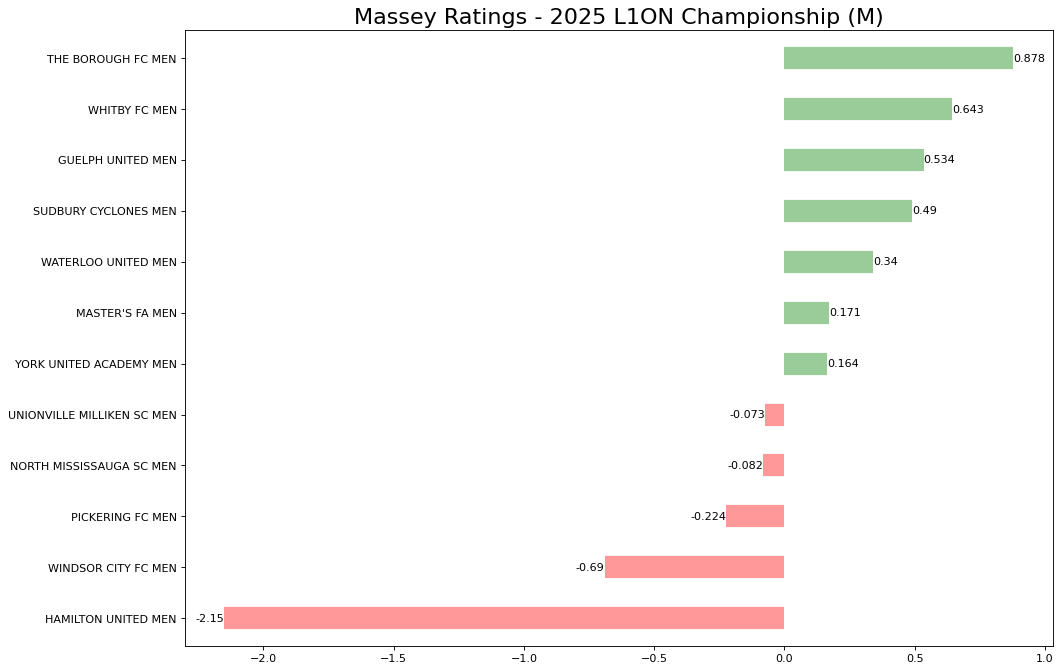

In [26]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (M)', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [27]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                            massey_rating
THE BOROUGH FC MEN               0.648086
SUDBURY CYCLONES MEN             0.601846
GUELPH UNITED MEN                0.535515
WHITBY FC MEN                    0.414720
MASTER'S FA MEN                  0.164358
YORK UNITED ACADEMY MEN          0.164089
UNIONVILLE MILLIKEN SC MEN       0.101797
WATERLOO UNITED MEN              0.073589
NORTH MISSISSAUGA SC MEN        -0.002179
PICKERING FC MEN                -0.212931
WINDSOR CITY FC MEN             -0.638711
HAMILTON UNITED MEN             -1.850180


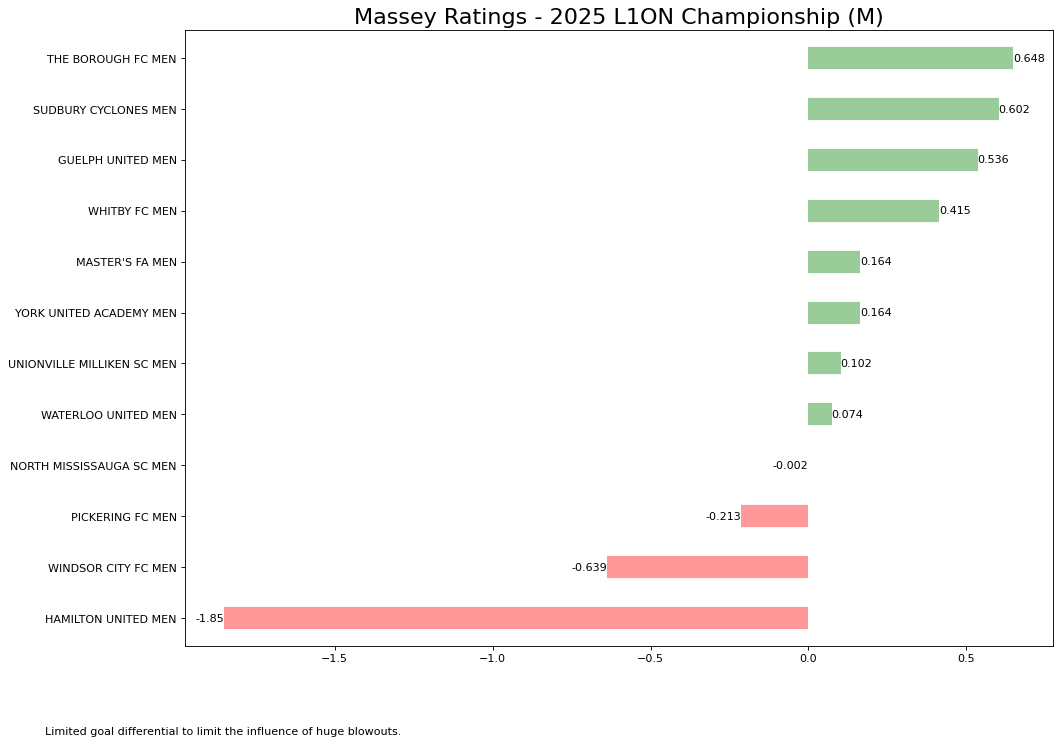

In [28]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Championship (M)', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()